In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
relevant_prices = [[(20, 2), (10, 1)], [(30, 5), (5, 2)]]

days_prices = []

for day in relevant_prices:
    days_prices.append(np.average([x[1] for x in day], weights=[x[0] for x in day]))

In [21]:
print(days_prices)

[1.6666666666666667, 4.571428571428571]


In [22]:
last_days = 2

# days_prices = [1/, 3, 2, 5, 6]

x = np.arange(0, last_days)
y = np.array(days_prices)
z = np.polyfit(x, y, 2)

p = np.poly1d(z)
acceptable = p(last_days)

print(x, y, acceptable)

[0 1] [1.66666667 4.57142857] 10.38095238095238


C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


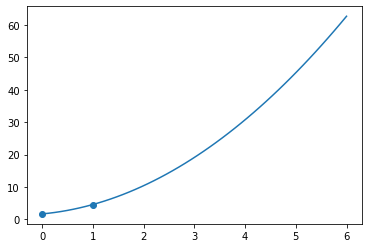

In [23]:
plt.scatter(x, y)
xs = np.linspace(0, 6)
ys = p(xs)
plt.plot(xs, ys)

In [760]:
data = pd.read_csv('csvs/data_new.csv', delimiter=';')
# data

In [761]:
prs = data[data['product']=='PEARLS'].reset_index()
bnn = data[data['product']=='BANANAS'].reset_index()
# bnn

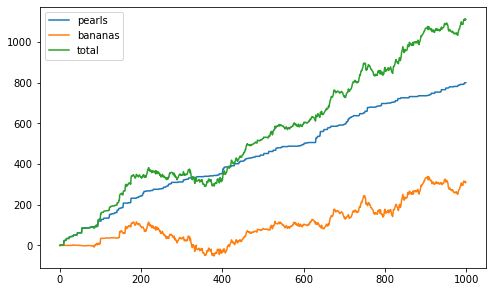

In [762]:
plt.plot(prs['profit_and_loss'], label='pearls')
plt.plot(bnn['profit_and_loss'], label='bananas')
plt.plot(bnn['profit_and_loss'].add(prs['profit_and_loss']), label='total')
plt.legend()

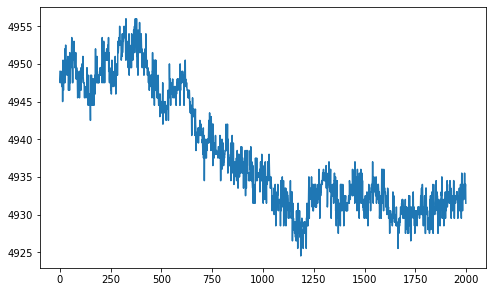

In [198]:
plt.plot(bnn['mid_price'])

In [750]:
def reweigh(xs, ys, a=0):
    out_x = []
    out_y = []
    for (x, y) in zip(xs, ys):
        l = a * int(np.power(len(ys) - x, -20.1)) + 1
        for i in range(l):
            out_x.append(x)
            out_y.append(y)
    return out_x, out_y 

In [757]:
timesteps = bnn.index

days = 25

avgs = []

for time in timesteps:
    if time < days:
        avgs.append(4900)
        continue
    x = np.arange(0, days)
        
    x, ys = reweigh(x, bnn['mid_price'][time-days:time])
    z = np.polyfit(x, ys, 0.1)
    
    p = np.poly1d(z)
    acceptable = p(days)
    avgs.append(acceptable)

In [758]:
print(ys)

[4898.0, 4895.5, 4896.0, 4895.5, 4895.5, 4896.0, 4895.5, 4896.0, 4894.5, 4894.5, 4894.5, 4894.0, 4894.0, 4893.5, 4895.0, 4893.5, 4891.5, 4893.5, 4893.5, 4895.5, 4891.5, 4892.5, 4890.5, 4894.0, 4892.5]


NameError: name 'avgs' is not defined

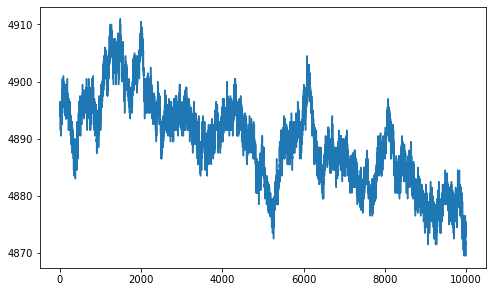

In [30]:
plt.rcParams["figure.figsize"] = (8, 4.8)

plt.plot(bnn['mid_price'])
plt.plot(avgs)
# plt.xlim(0, 100)

(1.127688844422211, 1.4884695013069458)

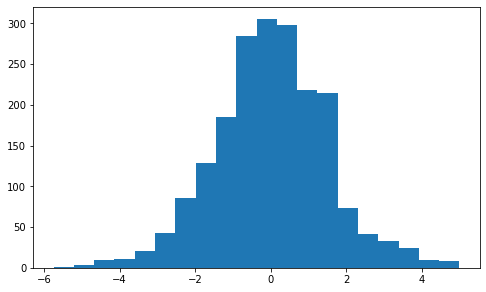

In [411]:
plt.hist(avgs-bnn['mid_price'], bins=20)
(np.mean(np.abs(avgs-bnn['mid_price'])), np.std(avgs-bnn['mid_price']))

In [190]:
mns = []
stds = []
poly = 4
for days in range(2, 100):
    print(days, end='\r')
    timesteps = bnn.index

    avgs = []

    for time in timesteps:
        if time < days:
            avgs.append(4950)
            continue

        ys = bnn['mid_price'][time-days:time]
        x = np.arange(0, days)
        z = np.polyfit(x, ys, poly)

        p = np.poly1d(z)
        acceptable = p(days)
        avgs.append(acceptable)
    mns.append(np.mean(np.abs(avgs-bnn['mid_price'])))
    stds.append(np.std(avgs-bnn['mid_price']))

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

poly 1: 14 days

2: 44

In [191]:
results.append([poly, np.argmin(mns), mns[np.argmin(mns)], np.argmin(stds), stds[np.argmin(stds)]])
results

[[1, 14, 1.0987562499999557, 14, 1.4534963373786995],
 [2, 29, 1.165336040044539, 44, 1.523225741104299],
 [3, 64, 1.2046309731935256, 64, 1.5673341621371413],
 [4, 80, 1.2423236518692424, 72, 1.6113705616451321]]

In [179]:
np.argmin(stds)

64

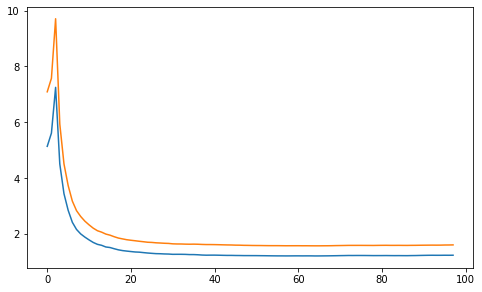

In [180]:
plt.plot(mns)

plt.plot(stds)

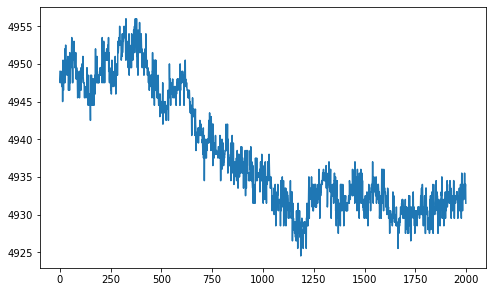

In [370]:
plt.plot(bnn['mid_price'])

In [408]:
hi = []
lo = []

window = 5
for time in bnn.index:
    d = bnn['mid_price'][max(0, time-window):time]
    
    hi.append(np.max(d))
    lo.append(np.min(d))

(0.0, 25.0)

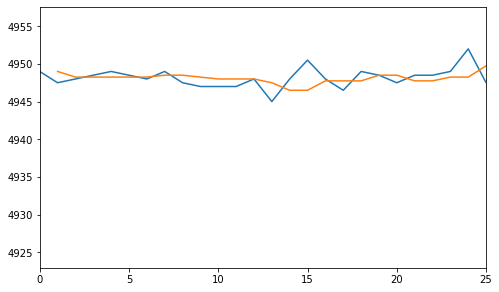

In [424]:
plt.plot(bnn['mid_price'])
# plt.fill_between(bnn.index, lo, hi, color='orange')
plt.plot(np.mean([hi, lo], axis = 0))
plt.xlim(0, 25)

In [410]:
avgs = np.mean([hi, lo], axis = 0)

In [777]:
stds = []
means = []
window = 5
for time in bnn.index:
    low = max(0, time-window)
    if low==0:
        stds.append(0)
        means.append(0)
        continue
    ys = bnn['mid_price'][low:time]
    x = np.arange(0, window)
#     print(x, ys)
    z = np.polyfit(x, ys, 3)
    
    y_hat = np.poly1d(z)(x)
    means.append(np.mean(np.abs(ys - y_hat)))
    stds.append(np.std(y_hat))

In [780]:
hi = []
lo = []
window = 15
for time in bnn.index:
    low = max(0, time-window)
    if low==0:
        hi.append(bnn['mid_price'][low])
        lo.append(bnn['mid_price'][low])
        continue
    a = 1.8
    d = np.mean(bnn['mid_price'][low:time])
    delta = stds[time-1]
#     delta = max(1, delta)
    hi.append(d + delta * a)
    lo.append(d - delta * a)

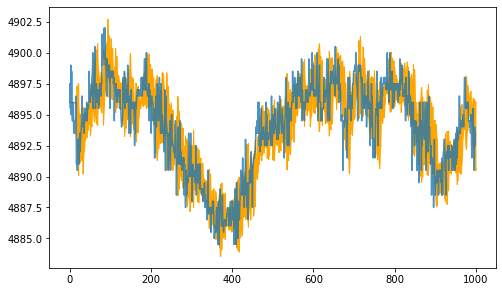

In [781]:
plt.plot(bnn['mid_price'], alpha=0.8)
plt.fill_between(bnn.index, hi, lo, color='orange')
# plt.xlim(0, 1200)

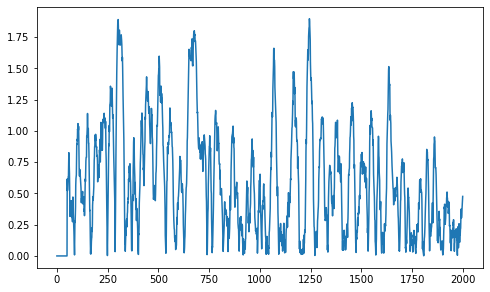

In [719]:
# plt.plot(means)
plt.plot(stds)

In [720]:
np.mean(stds)

0.5897690286883963

In [644]:
data = pd.read_csv('island-data-bottle-round-1/trades_round_1_day_0_nn.csv', delimiter=';')
data

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
1,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,2
2,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,1
3,400,NaN,NaN,BANANAS,SEASHELLS,4899.0,9
4,500,NaN,NaN,BANANAS,SEASHELLS,4899.0,1
...,...,...,...,...,...,...,...
5162,998800,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
5163,998800,NaN,NaN,BANANAS,SEASHELLS,4870.0,1
5164,999300,NaN,NaN,BANANAS,SEASHELLS,4875.0,17
5165,999500,NaN,NaN,BANANAS,SEASHELLS,4869.0,2


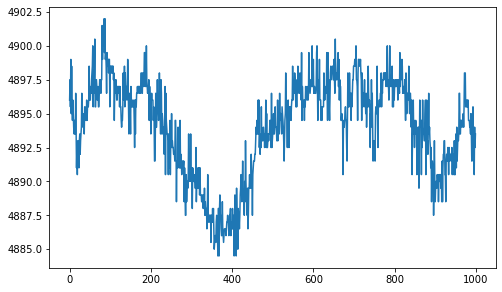

In [787]:
midprice = bnn['mid_price']
plt.plot(midprice)

In [788]:
z = np.polyfit(midprice.index, midprice, 30)
y_hat = np.poly1d(z)(midprice.index)

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


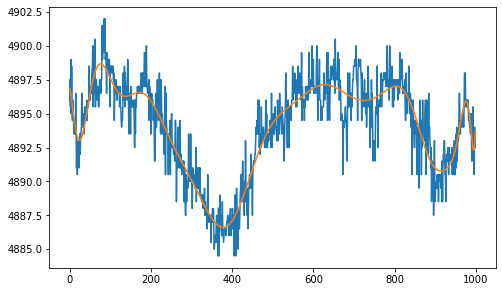

In [789]:
plt.plot(midprice)
plt.plot(y_hat)

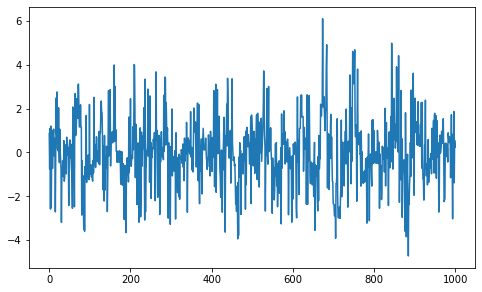

In [790]:
plt.plot(y_hat - midprice)

In [791]:
s = np.std(y_hat - midprice)

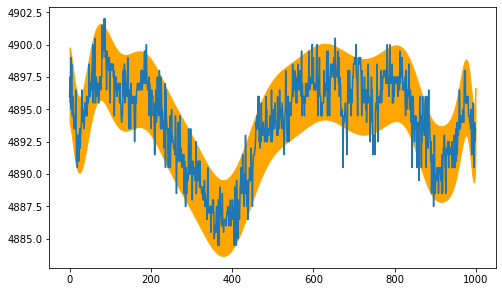

In [792]:
plt.plot(midprice)
plt.fill_between(midprice.index, y_hat + 2*s, y_hat - 2*s, color='orange')

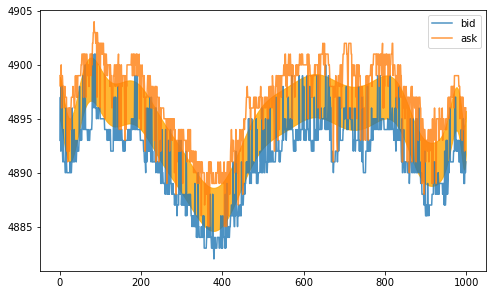

In [801]:
plt.plot(bnn.index, bnn['bid_price_1'], label='bid', alpha=0.8)
plt.plot(bnn.index, bnn['ask_price_1'], label='ask', alpha=0.8)
plt.fill_between(midprice.index, y_hat + 2, y_hat - 2, color='orange', alpha=0.8)
plt.legend()

In [799]:
bnn[['ask_price_1', 'bid_price_1']]

,ask_price_1,bid_price_1
0,4899,4893
1,4898,4897
2,4899,4892
3,4900,4898
4,4896,4894
...,...,...
995,4896,4889
996,4892,4889
997,4896,4892
998,4895,4890


In [800]:
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,PEARLS,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.000000
1,0,0,BANANAS,4893,9,4892.0,23.0,NaN,NaN,4899,23,NaN,NaN,NaN,NaN,4896.0,0.000000
2,0,100,PEARLS,10002,1,10000.0,2.0,9998.0,4.0,10004,1,10005.0,21.0,NaN,NaN,10003.0,0.000000
3,0,100,BANANAS,4897,1,4892.0,26.0,NaN,NaN,4898,22,NaN,NaN,NaN,NaN,4897.5,0.000000
4,0,200,PEARLS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,99700,PEARLS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,800.000000
1996,0,99800,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,800.000000
1997,0,99800,BANANAS,4890,26,NaN,NaN,NaN,NaN,4895,5,4896.0,1.0,4897.0,25.0,4892.5,307.695312
1998,0,99900,BANANAS,4891,5,4890.0,28.0,NaN,NaN,4896,28,NaN,NaN,NaN,NaN,4893.5,310.929688


In [394]:
data = pd.read_csv('island-data-bottle-round-3/prices_round_3_day_2.csv', delimiter=';')
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,PEARLS,9998.0,3.0,9996.0,1.0,9995.0,21.0,10004.0,1.0,10005.0,21.0,NaN,NaN,10001.0,0.0
1,2,0,BANANAS,4822.0,3.0,4821.0,22.0,NaN,NaN,4827.0,22.0,NaN,NaN,NaN,NaN,4824.5,0.0
2,2,0,DIVING_GEAR,99191.0,20.0,NaN,NaN,NaN,NaN,99194.0,20.0,NaN,NaN,NaN,NaN,99192.5,0.0
3,2,0,COCONUTS,7923.0,214.0,NaN,NaN,NaN,NaN,7925.0,64.0,7926.0,150.0,NaN,NaN,7924.0,0.0
4,2,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3076.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,999900,COCONUTS,7910.0,212.0,NaN,NaN,NaN,NaN,7913.0,212.0,NaN,NaN,NaN,NaN,7911.5,70584.0
69996,2,999900,DIVING_GEAR,100178.0,28.0,NaN,NaN,NaN,NaN,100181.0,28.0,NaN,NaN,NaN,NaN,100179.5,-510408.0
69997,2,999900,BERRIES,3905.0,19.0,3904.0,55.0,NaN,NaN,3912.0,74.0,NaN,NaN,NaN,NaN,3908.5,-85040.0
69998,2,999900,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3094.0,0.0


In [395]:
dol = data[data['product']=='DOLPHIN_SIGHTINGS'].reset_index()['mid_price']
dvg = data[data['product']=='DIVING_GEAR'].reset_index()['mid_price']
brs = data[data['product']=='BERRIES'].reset_index()['mid_price']

(7920.0, 7940.0)

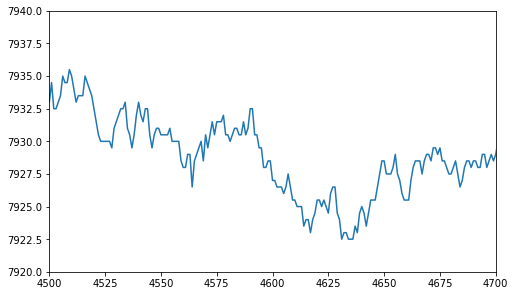

In [411]:
plt.plot(ccn['mid_price'])
plt.xlim(4500, 4700)
plt.ylim(7920, 7940)

(100000.0, 100200.0)

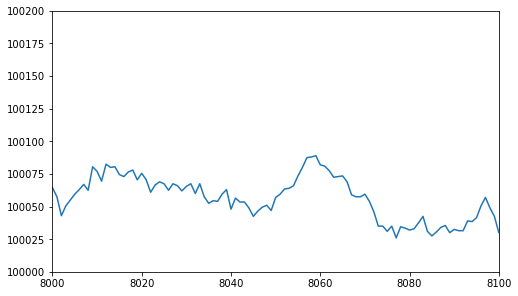

In [405]:
plt.plot(dvg)
plt.xlim(8000, 8100)
plt.ylim(100000, 100200)

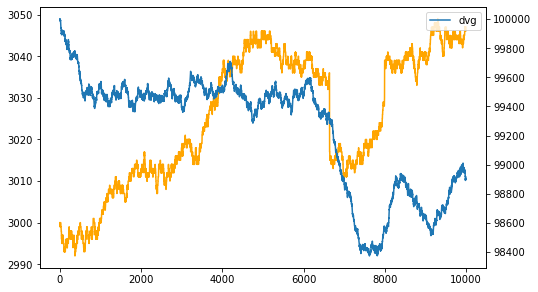

In [387]:
fig, ax1 = plt.subplots()
ax1.plot(dol, label='dol', color='orange')

ax2 = ax1.twinx()

ax2.plot(dvg, label='dvg')

# plt.plot((dol- np.mean(dol))*50, label='dol')
# plt.plot(dvg-np.mean(dvg), label='dvg')
plt.legend()
# plt.xlim(6000, 7500)

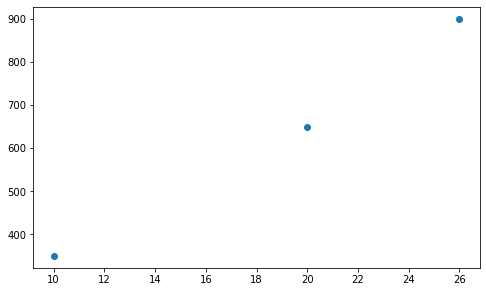

In [386]:
x = [10, 26, 20]
y = [350, 900, 650]
plt.scatter(x, y)

In [406]:
prs = data[data['product']=='PEARLS'].reset_index()
bnn = data[data['product']=='BANANAS'].reset_index()
pcl = data[data['product']=='PINA_COLADAS'].reset_index()
ccn = data[data['product']=='COCONUTS'].reset_index()

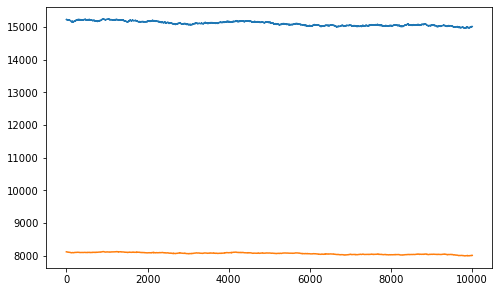

In [67]:
mid_pcl_t = pcl['mid_price']
mid_ccn_t = ccn['mid_price']

plt.plot(mid_pcl)
plt.plot(mid_ccn)
# plt.xlim(0, 2000)

In [19]:
np.dot(mid_pcl, mid_ccn) / len(mid_ccn)

1940.9754383675001

In [209]:
res = []

for i in range(1, len(means_pina)-1):
    print(i, end='\r')
    res.append(np.dot(means_pina[1:][i:], means_coco[1:][:-i]) / (len(means_pina) - i))

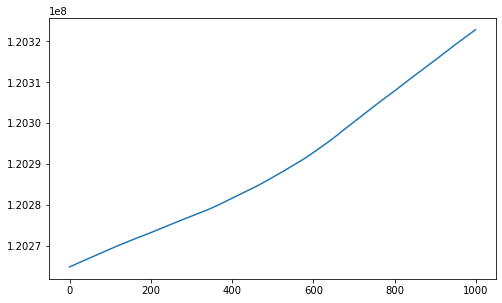

In [212]:
plt.plot(res[:1000])

In [70]:
pina = mid_pcl
coco = mid_ccn

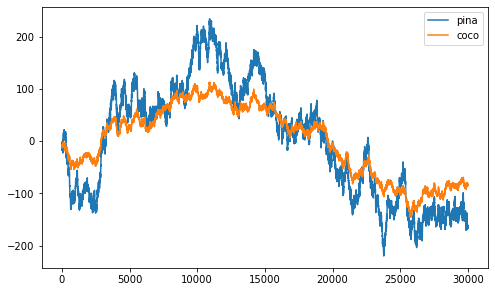

In [193]:
plt.plot(m_pina, label='pina')
plt.plot(m_coco, label='coco')
plt.legend()
# plt.xlim(14000, 16000)

In [72]:
m_pina = pina - np.mean(pina)
m_coco = coco - np.mean(coco)

(2000.0, 2200.0)

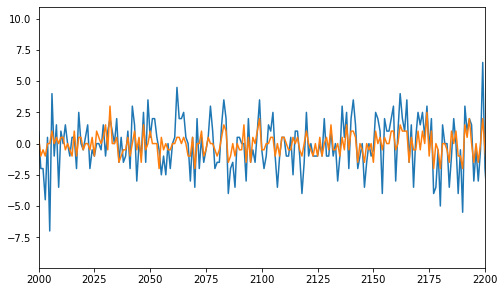

In [77]:
plt.plot(np.diff(m_pina))
plt.plot(np.diff(m_coco))
plt.xlim(2000, 2200)

In [85]:
pina_diff = np.abs(np.diff(pina))
coco_diff = np.abs(np.diff(coco))

In [86]:
res = []

for i in range(1, len(pina_diff)):
    res.append(np.dot(pina_diff[i:], coco_diff[:-i]) / (len(pina_diff) - i))

In [339]:
m = 5
d = 10

means_pina = []
diffs_pina = []
for t in range(len(pina)):
    ts = max(0, t-m)
    if t < d:
        means_pina.append(np.mean(pina[ts:t]))
        diffs_pina.append(0)
        continue
        
    means_pina.append(np.mean(pina[ts:t]))
    diffs_pina.append(means_pina[-1] - means_pina[-d])

means_coco = []
diffs_coco = []
for t in range(len(coco)):
    ts = max(0, t-m)
    if t < d:
        means_coco.append(np.mean(coco[ts:t]))
        diffs_coco.append(0)
        continue
        
    means_coco.append(np.mean(coco[ts:t]))
    diffs_coco.append(means_coco[-1] - means_coco[-d])

C:\Users\drobi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\drobi\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


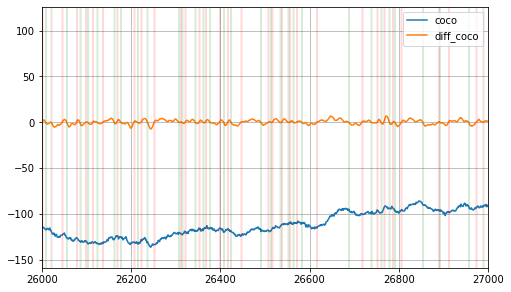

In [343]:
up = []
down = []
for i in range(2, len(diffs_pina)):
    if diffs_coco[i-2] <= 0 and diffs_coco[i] > 0:
        up.append(i)
    if diffs_coco[i-2] > 0 and diffs_coco[i] <= 0:
        down.append(i)

# plt.plot(m_pina, label='pina')
plt.plot(m_coco, label='coco')
# plt.plot(diffs_pina, label='diff_pina')
plt.plot(diffs_coco, label='diff_coco')
# plt.plot(means_pina - np.mean(pina), label='mean_pina')
# plt.plot(means_coco - np.mean(coco), label='mean_coco')
[plt.axvline(x, color='red', alpha = 0.1) for x in up]
[plt.axvline(x, color='green', alpha = 0.1) for x in down]
plt.legend()
plt.xlim(26000, 27000)
plt.grid()

In [344]:
p = 0
for i in range(2, len(diffs_pina)):
    if diffs_coco[i-2] < 0 and diffs_coco[i] > 0.0:
        p =- coco[i]
    if diffs_coco[i-2] > 0 and diffs_coco[i] < 0.0:
        p =+ coco[i]
p

7924.5

In [263]:
[1, 2, 3, 4, 4][-2:]

[4, 4]

In [414]:
data = pd.read_csv('cfd1928f-1d9f-498b-a71b-092340d0715c.csv', delimiter=';')

In [418]:
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3094.0,0.000000
1,3,0,BERRIES,3905.0,14.0,3904.0,52.0,NaN,NaN,3912.0,14.0,3913.0,52.0,NaN,NaN,3908.5,0.000000
2,3,0,PEARLS,9996.0,2.0,9995.0,25.0,NaN,NaN,10004.0,2.0,10005.0,25.0,NaN,NaN,10000.0,0.000000
3,3,0,DIVING_GEAR,100187.0,21.0,NaN,NaN,NaN,NaN,100190.0,21.0,NaN,NaN,NaN,NaN,100188.5,0.000000
4,3,0,PINA_COLADAS,14849.0,21.0,14848.0,51.0,NaN,NaN,14852.0,72.0,NaN,NaN,NaN,NaN,14850.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,3,999900,COCONUTS,7946.0,200.0,NaN,NaN,NaN,NaN,7948.0,69.0,7949.0,131.0,NaN,NaN,7947.0,-57885.500000
69996,3,999900,BANANAS,4749.0,2.0,4748.0,23.0,NaN,NaN,4753.0,1.0,4755.0,25.0,NaN,NaN,4751.0,11938.828125
69997,3,999900,PEARLS,9996.0,2.0,9995.0,23.0,NaN,NaN,9998.0,1.0,10002.0,5.0,10004.0,2.0,9997.0,14766.000000
69998,3,999900,DIVING_GEAR,100295.0,24.0,NaN,NaN,NaN,NaN,100298.0,24.0,NaN,NaN,NaN,NaN,100296.5,-51454.000000


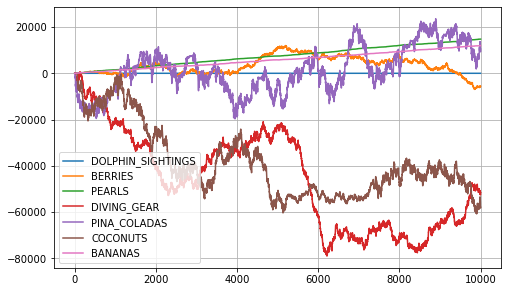

In [421]:
for x in data['product'].drop_duplicates():
    plt.plot(data[data['product']==x].reset_index()['profit_and_loss'], label=x)
    plt.legend()
plt.grid()

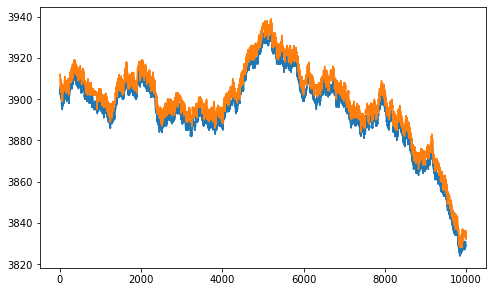

In [434]:
plt.plot(data[data['product'] == 'BERRIES'].reset_index()['bid_price_1'])
plt.plot(data[data['product'] == 'BERRIES'].reset_index()['ask_price_1'])
# plt.xlim(0, 200)
# plt.ylim(3890, 3920)